tess-15
All rows number= 1178
NaN rows number= 0
NaN rows number afte remove= 0
All rows number afte remove= 1178


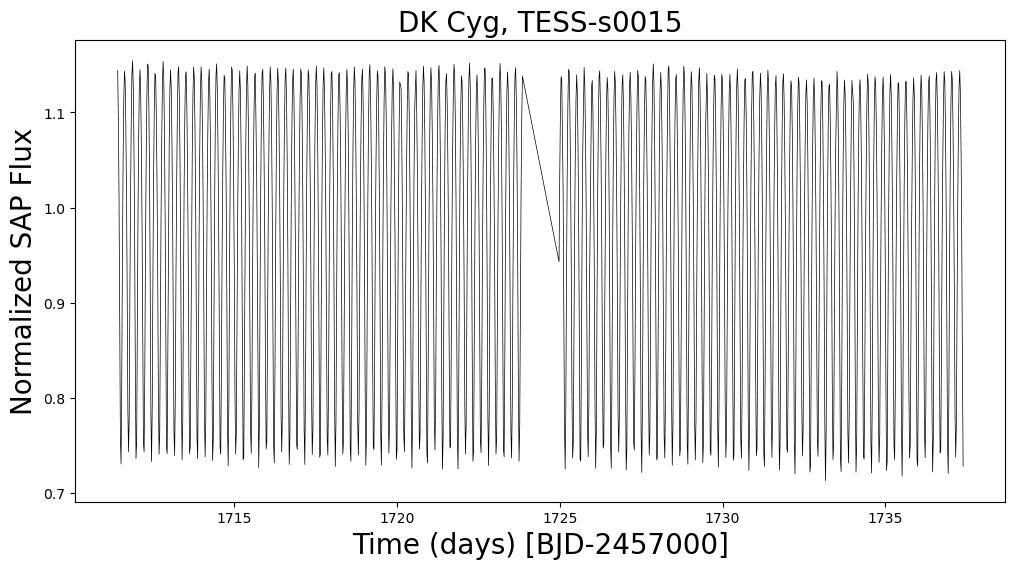

In [1]:
##########   Import necessary packages   ##########
import lightkurve as lk
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import numpy as np
import pandas as pd
import math
import openpyxl
import xlrd
import astropy.units as u


##########   Download data from MAST   ##########
Target_name = str('DK Cyg')
search_result = lk.search_lightcurve(f'{Target_name}')
search_result


##########   Download TESS-SPOC data sectors for CW Cas   ##########
lc=search_result[0].download()
secnum = str('tess-') + str(lc.sector)
tessID = str('TIC') + str(lc.targetid)
print(secnum)
#print(Target_name)
#print(tessID)
#lc.show_properties()
lc


lc.time.value # Time (BJD) data
np.array(lc.sap_flux.value) # SAP flux data
np.array(lc.sap_flux_err.value) # SAP flux error data


##########   Calculate Normalized flux based on the SAP flux and remove NaN rows   ##########

lc0 = lk.LightCurve(time=lc.time.value,
                    flux=np.array(lc.sap_flux.value), 
                    flux_err=np.array(lc.sap_flux_err.value))


print('All rows number=', len(lc0.flux))
print('NaN rows number=', len(lc0.flux[np.isnan(lc0.flux)]))
lc0 = lc0.remove_nans()
print('NaN rows number afte remove=', len(lc0.flux[np.isnan(lc0.flux)]))
print('All rows number afte remove=', len(lc0.flux))


normalized_lc0 = lc0.normalize()
normalized_lc0.flux
normalized_lc0.flux_err


##########   Plotting Normalized SAP flux   ##########

plt.figure(figsize=(12,6))
plt.plot(lc0.time.value, normalized_lc0.flux, c='black', linewidth=0.5)
plt.xlabel('Time (days) [BJD-2457000]',fontsize=20)
plt.ylabel('Normalized SAP Flux',fontsize=20)
plt.title(f'{Target_name}, TESS-s00{lc.sector}', fontsize=20)


################## Save data to *.txt file   ######################### 
f = open(f'{Target_name}_{secnum}.txt','w')

f.write('#Time(BJD-2457000)'+' '+ 'SAP_flux'+' '+'SAP_flux_err'+' '+'Norm_flux'+' '+'Nomr_flux_err'+'\n')
 
for i in range(len(lc0.time)):
    f.write (str(lc0.time.value[i]) +' '
             + str(lc0.flux.value[i]) +' '
             + str(lc0.flux_err.value[i]) +' '
             + str(normalized_lc0.flux[i]) +' '
             + str(normalized_lc0.flux_err[i]) + '\n')
f.close()


##########   Save data to excel file  ##########
##########   Time(BJD), SAP_flux, SAP_flux_err, Normalized_flux, Normalized_flux_error   ##########

wb0=openpyxl.Workbook()
sheet0=wb0.active 
for i in range(len(lc0.time)):
    sheet0.cell(row=i+1,column=1).value=float(lc0.time.value[i])
    sheet0.cell(row=i+1,column=2).value=float(lc0.flux.value[i])
    sheet0.cell(row=i+1,column=3).value=float(lc0.flux_err.value[i])
    sheet0.cell(row=i+1,column=4).value=float(normalized_lc0.flux[i])
    sheet0.cell(row=i+1,column=5).value=float(normalized_lc0.flux_err[i])

wb0.save(f'{Target_name}_{secnum}.xlsx')